In [11]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('/Users/mac/Desktop/菜菜的sklearn课堂课件/03数据预处理和特征工程/digit recognizor.csv')
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [3]:
RFC_ = RFC(n_estimators=10, random_state=0)
X_embedded = SelectFromModel(estimator=RFC_, threshold=0.005).fit_transform(X, y)

In [4]:
X_embedded.shape

(42000, 47)

In [8]:
(RFC_.fit(X, y).feature_importances_).max()

0.01276360214820271

In [9]:
threshold = np.linspace(0, (RFC_.fit(X, y).feature_importances_).max(), 20)

In [10]:
threshold

array([0.        , 0.00067177, 0.00134354, 0.00201531, 0.00268707,
       0.00335884, 0.00403061, 0.00470238, 0.00537415, 0.00604592,
       0.00671769, 0.00738945, 0.00806122, 0.00873299, 0.00940476,
       0.01007653, 0.0107483 , 0.01142007, 0.01209183, 0.0127636 ])

/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=0.000671768534115932 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=0.001343537068231864 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=0.002015305602347796 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/usr/local/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass threshold=0.002687074136463728 as keyword args. From version 0.25 

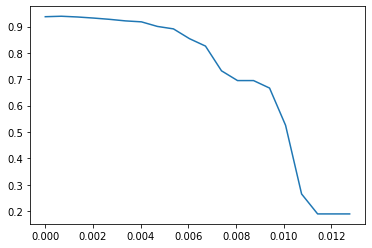

In [13]:
score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    score.append(cross_val_score(RFC_,  X_embedded, y, cv=5).mean())
plt.plot(threshold, score)
plt.show()

In [17]:
X_embedded = SelectFromModel(RFC_, threshold=0.00067177).fit_transform(X, y)
X_embedded.shape

(42000, 324)

In [18]:
cross_val_score(RFC_, X_embedded, y, cv=5).mean()

0.9391190476190475

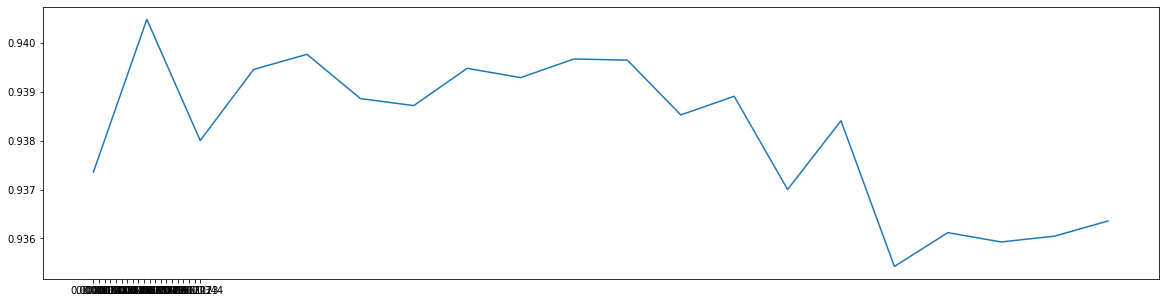

In [19]:
score = []
for i in np.linspace(0, 0.00134354, 20):
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    score.append(cross_val_score(RFC_,  X_embedded, y, cv=5).mean())

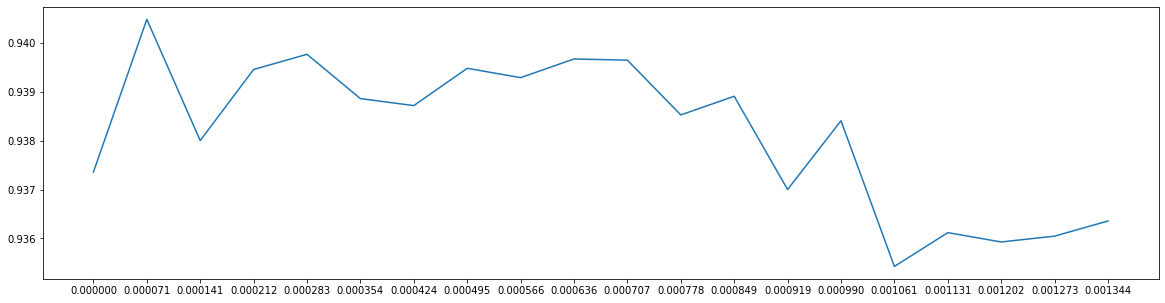

In [23]:
plt.figure(figsize=[20, 5])
plt.plot(np.linspace(0, 0.00134354, 20), score)

# x轴坐标的刻度
plt.xticks(np.linspace(0, 0.00134354, 20))
plt.show()

In [34]:
X_embedded = SelectFromModel(RFC_, threshold=0.000283).fit_transform(X, y)

In [35]:
X_embedded.shape

(42000, 386)

In [32]:
cross_val_score(RFC_, X_embedded, y, cv=5).mean()

0.9388809523809524

In [33]:
cross_val_score(RFC(n_estimators=100, random_state=0), X_embedded, y, cv=5).mean()

0.964642857142857